Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory

__Context:__

* Data : $X_1,..,X_n \sim f$ where $f$ is a density with support $I = [a,b]$ 

* estimator: $\hat{f}_m(x)= \sum_{i=j}^m \hat{a}_j \psi_j$, with $(\psi_m)_{m \in \mathbb{N}}$ b.o.n of $I$ and $\hat{a}_j = \frac{1}{n} \sum_{i=1}^n \psi_j(X_i)$

* sample size: $n$

In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

In [49]:
np.random.seed(seed=233423)
n = 10000
gauss = norm(loc=0, scale=1)
rnorm = lambda n : gauss.rvs(n)
runif = lambda n: uniform(loc=-np.pi, scale=2*np.pi).rvs(n)

In [203]:
class projection(BaseEstimator, LinearClassifierMixin):
    def __init__(self, m = 20, base='trigo'):
        self.f_hat = None
        self.m = m
        self.f_base = None
        self.f_four = None
        if base == 'trigo':
            self.f_base = lambda x,j : np.c_[np.cos(-j*x), np.sin(j*x)]
            self.f_four = lambda x,j : np.c_[np.cos(j*x), np.sin(j*x)]
    def fit(self, X, fX):
        coeff = []
        def f_hat(xs):
            res = np.zeros(shape=(len(xs), 2 * self.m + 1));
            for _,m in enumerate(np.arange(-self.m, self.m + 1)):
                res[:,_] = self.f_four(xs,m).dot((fX[:,np.newaxis]*(self.f_base(X,m))).mean(axis=0))
            return res.sum(axis=1)
        self.f_hat = f_hat
        
    def predict(self, x):
        return self.f_hat(x)
    

    def plot(self, X):
        return np.sign(self.decision_function(X))

In [208]:
X = runif(n)
X.sort()
#X = rnorm(n)
fX = np.sin(X) + np.cos(X)-2 * np.sin(4*X)
proj = projection()
proj.fit(X, fX)
xs = np.linspace(X.min(),X.max(),300)

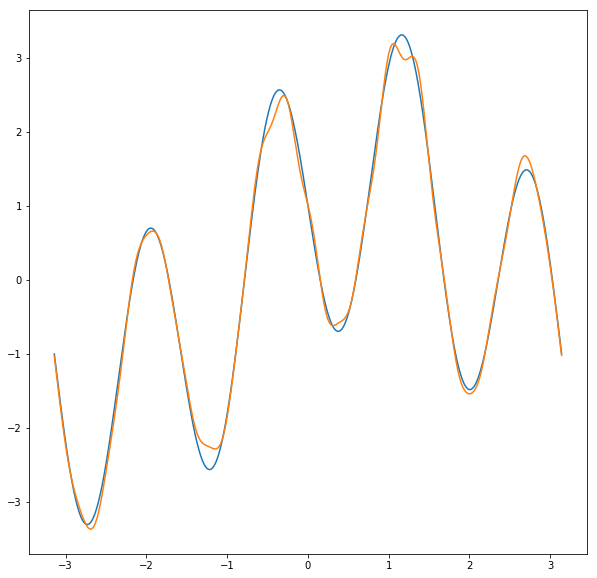

In [209]:
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(X, fX)
ax.plot(xs, proj.predict(xs))